# Housing Prices Dataset (Regression)

The following notebook addresses the regression and classification problem of predicting housing prices. The dataset is taken from https://www.kaggle.com/datasets/yasserh/housing-prices-dataset.

## 1. Import libraries and load the data

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv(r"C:\Users\Sabrina\OneDrive\Desktop\David_work\Python\Housing.csv")
print(df.head())
print(df.info())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

- The data were loaded successfully
- The dataset contains 545 entries for 13 columns with no missing data --> no further cleaning required here
- **price** will be the target variable for linear regression
- mainroad, guestroom, basement, hotwaterheating, airconditioning, prefarea and furnishingstatus are categorical features

In [14]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [186]:
df.nunique().sort_values()

mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
prefarea              2
furnishingstatus      3
bathrooms             4
stories               4
parking               4
bedrooms              6
price               219
area                284
dtype: int64

Numeric features can be analyzed with *describe()*
- The mean price for housing is ~ $4.8M
- the mean number of bedrooms is 3

Make a boxplot for each to check for outliers.

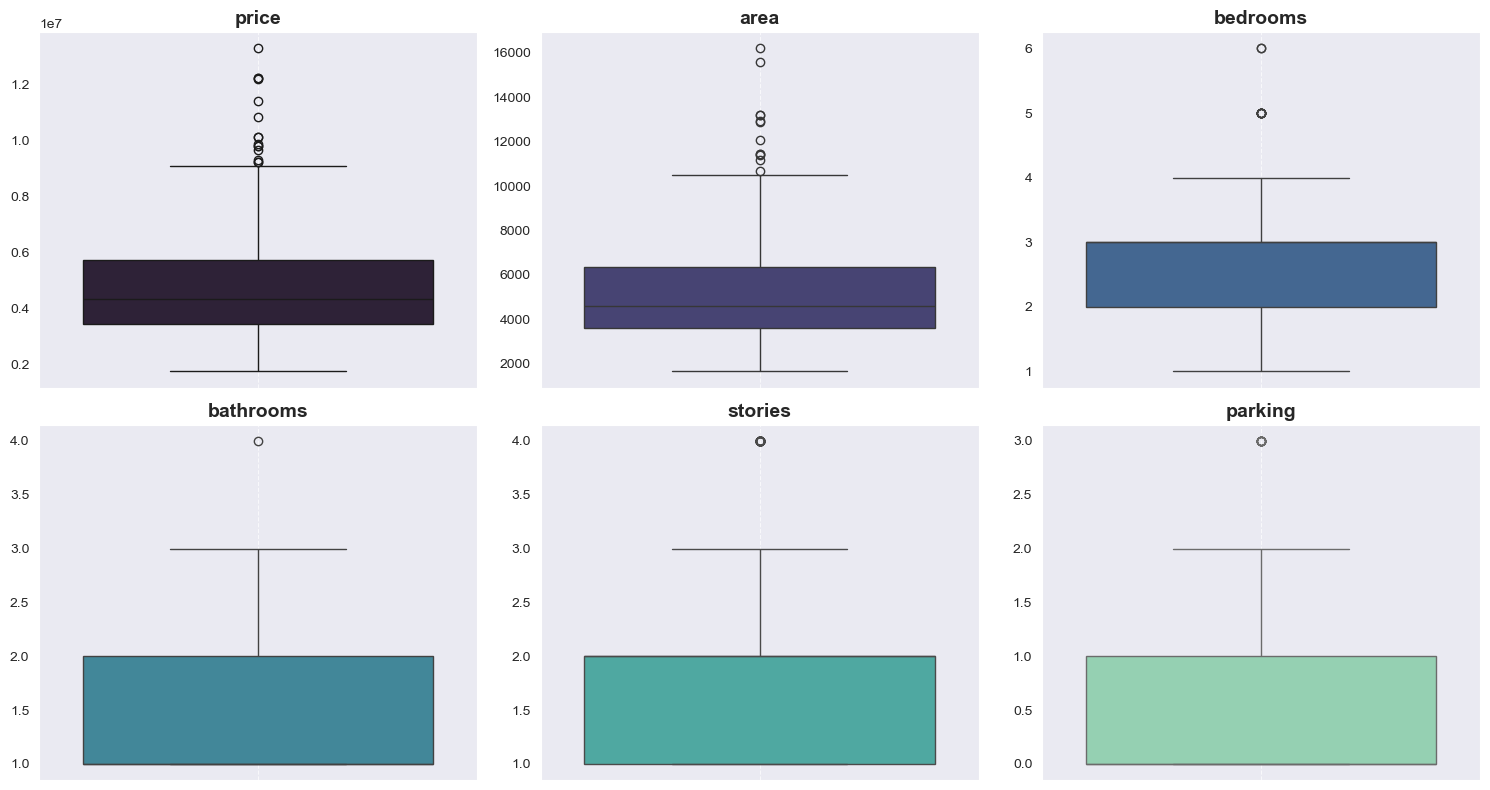

In [37]:
import math
numeric_cols = df.select_dtypes(include=["number"])
num_features = len(numeric_cols.columns)
cols = 3
rows = math.ceil(num_features / cols)
sns.set_style("dark")
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()
palette = sns.color_palette("mako", num_features)
for i, col in enumerate(numeric_cols.columns):
    sns.boxplot(y=numeric_cols[col], ax=axes[i], color=palette[i])
    axes[i].set_title(col, fontsize=14, fontweight = "bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    axes[i].grid(axis="x", linestyle="--", alpha=0.7)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

Check the distribution of key features in histograms and area plots

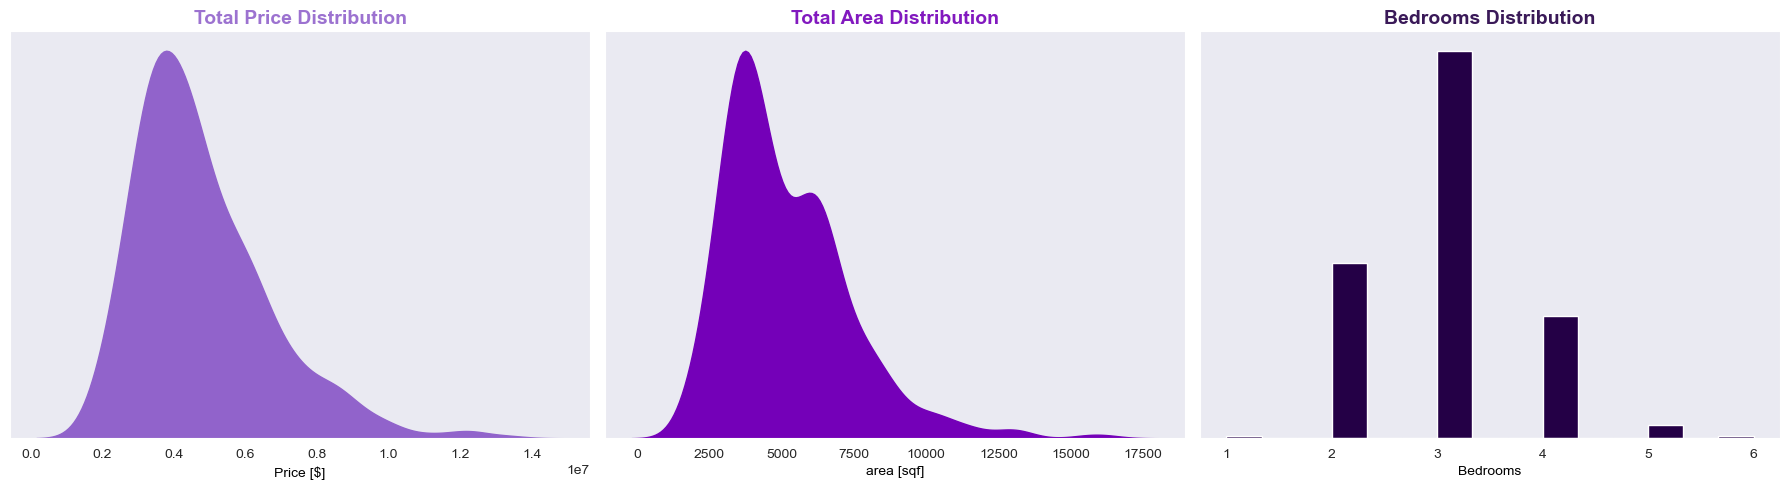

In [71]:
# Numeric distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# Plot price Distribution
sns.kdeplot(data=df, x='price', ax=axes[0], fill=True, color='#9163CB', alpha=1)
axes[0].set_xlabel('Price [$]', fontdict = {'font':'Arial', 'color': 'black', 'size': 10})
axes[0].set_title('Total Price Distribution', {'font':'Arial', 'color': '#9163CB','weight':'bold','size':14}, alpha = 0.9)
axes[0].get_yaxis().set_visible(False)

# Plot area Distribution
sns.kdeplot(data=df, x='area', ax=axes[1], fill=True, color='#7400b8', alpha=1)
axes[1].set_xlabel('area [sqf]', fontdict = {'font':'Arial', 'color': 'black', 'size': 10})
axes[1].set_title('Total Area Distribution', {'font':'Arial', 'color': '#7400b8','weight':'bold','size':14}, alpha = 0.9)
axes[1].get_yaxis().set_visible(False)

# Plot area Distribution
sns.histplot(data=df, x='bedrooms', ax=axes[2], bins=15, color="#240046", alpha=1)
axes[2].set_xlabel('Bedrooms', fontdict={'font': 'Arial', 'color': 'black', 'size': 10})
axes[2].set_title('Bedrooms Distribution', fontdict={'font': 'Arial', 'color': "#240046", 'weight': 'bold', 'size': 14}, alpha=0.9)
axes[2].get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

Check the distribution of categorical columns

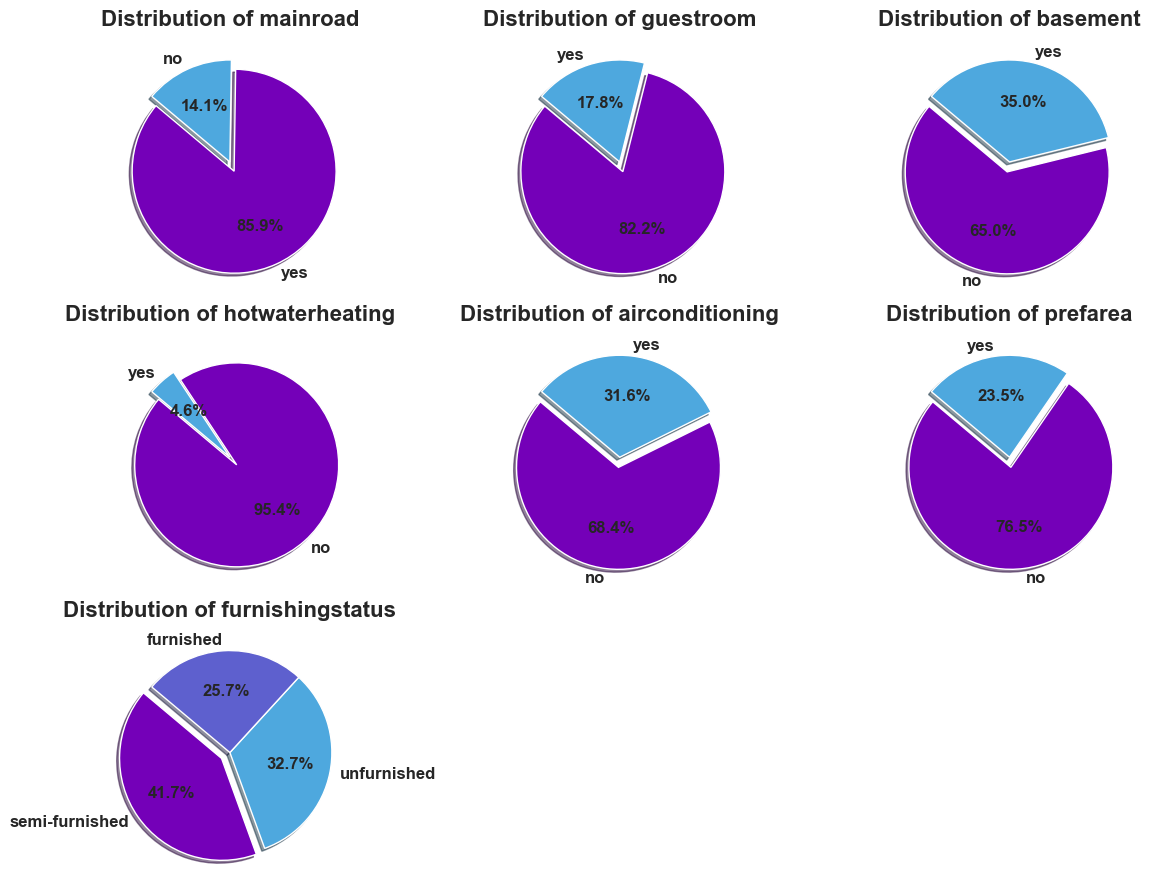

In [78]:
# Define categorical variables to visualize
categorical_columns = ["mainroad", "guestroom", "basement", "hotwaterheating", 
                       "airconditioning", "prefarea", "furnishingstatus"]

num_cols = 3
num_rows = -(-len(categorical_columns) // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, num_rows * 3))
axes = axes.flatten()

colors_list = ["#7400b8", "#4ea8de", "#5e60ce", "#56cfe1", "#72efdd", "#80ffdb", "#c19ee0"]

for i, col in enumerate(categorical_columns):
    value_counts = df[col].value_counts()
    labels = value_counts.index
    sizes = value_counts.values
    explode = [0.1 if idx == 0 else 0 for idx in range(len(labels))]
    wedges, texts, autotexts = axes[i].pie(
        sizes, labels=labels, autopct='%1.1f%%', colors=colors_list[:len(labels)],
        startangle=140, explode=explode, shadow=True, wedgeprops={'edgecolor': 'white'}
    )
    for text in texts + autotexts:
        text.set_fontsize(12)
        text.set_weight('bold')

    axes[i].set_title(f"Distribution of {col}", fontsize=16, fontweight="bold")
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

## How do numeric features correlate?


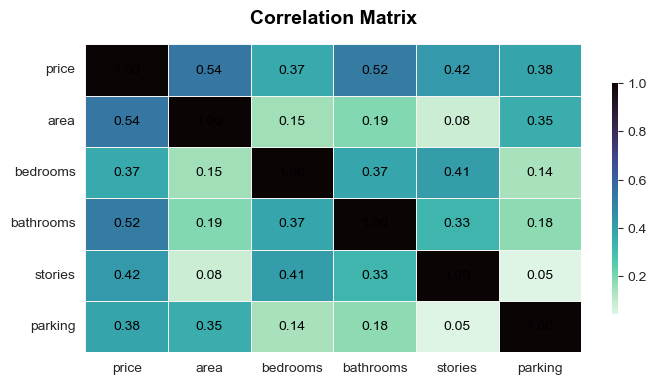

In [91]:
plt.figure(figsize=(8, 4))
sns.heatmap(df.corr(numeric_only=True),
            cmap="mako_r",
            fmt=".2f",
            annot=True,
            linewidths=0.5,
            linecolor="#f6f5f5",
            annot_kws={"size": 10, "color": "black"},
            cbar_kws={"shrink": 0.75, "aspect": 40},)
plt.title("Correlation Matrix", fontsize=14, color="Black", fontweight="bold", pad=15)
plt.show()

It appears that are and #bathrooms correlate with price.
For further analysis and machine learning, categorical features need to be converted to numeric one.

In [310]:
#Make copy of the df
df2 = df.copy()

from sklearn.preprocessing import (StandardScaler,
                                   LabelEncoder,
                                   OneHotEncoder)

categorical_cols = df2.select_dtypes(include=["object"]).columns
numeric_cols = df2.select_dtypes(include=["number"]).columns
df2[categorical_cols] = df2[categorical_cols].astype(str)
# Handle categorical features (One-Hot Encoding)
df_encoded = pd.get_dummies(df2, columns=categorical_cols, drop_first=True, dtype=int)

# Scale numeric features
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Display processed dataframe
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4.566365,1.046726,1.403419,1.421812,1.378217,1.517692,1,0,0,0,1,1,0,0
1,4.004484,1.757010,1.403419,5.405809,2.532024,2.679409,1,0,0,0,1,0,0,0
2,4.004484,2.218232,0.047278,1.421812,0.224410,1.517692,1,0,1,0,0,1,1,0
3,3.985755,1.083624,1.403419,1.421812,0.224410,2.679409,1,0,1,0,1,1,0,0
4,3.554979,1.046726,1.403419,-0.570187,0.224410,1.517692,1,1,1,0,1,0,0,0


In [314]:
# correlation map for all the features
df_corr = df_encoded.corr()
mask = np.triu(np.ones_like(df_corr, dtype=np.bool_))
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

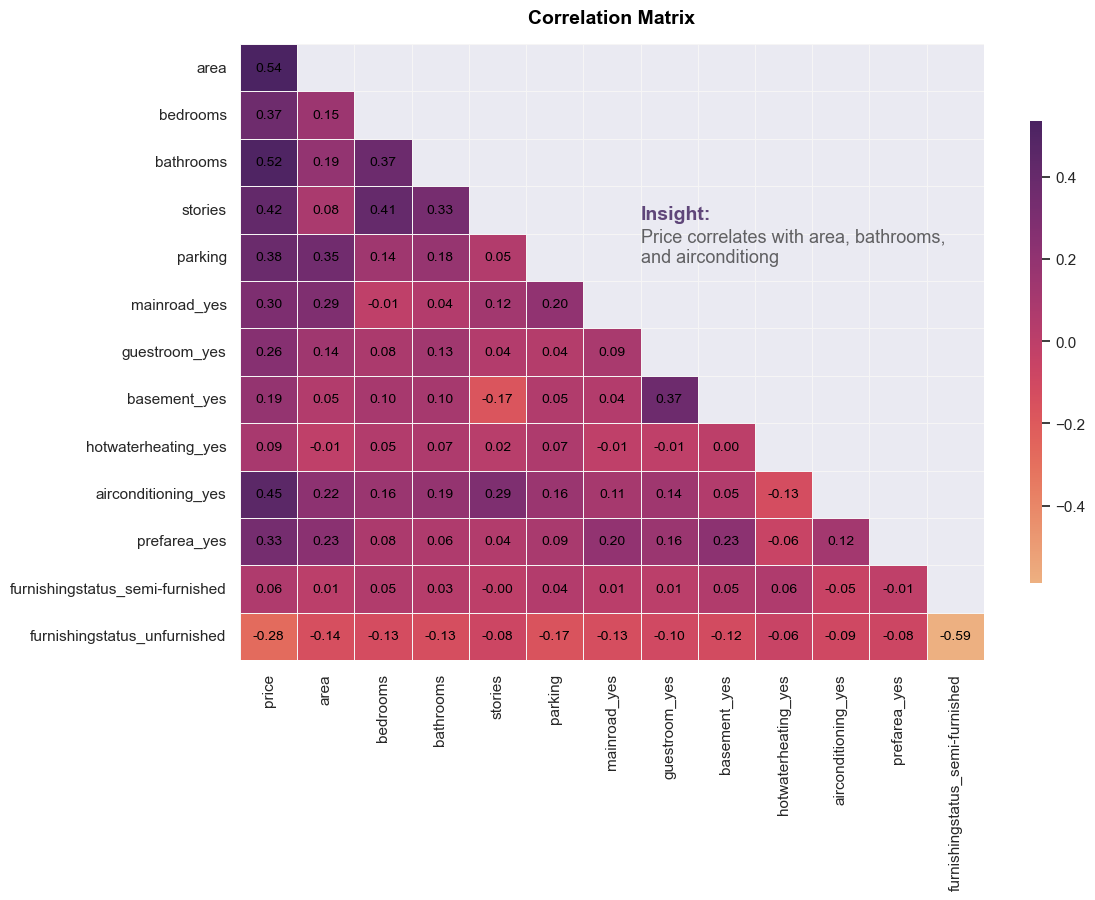

In [316]:
sns.set_theme(style="dark")
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    corr,
    mask = mask,
    cmap="flare",
    fmt=".2f",
    annot=True,
    linewidths=0.5,
    linecolor="#f6f5f5",
    annot_kws={"size": 10, "color": "black"},
    cbar_kws={"shrink": 0.75, "aspect": 40},
)
plt.title("Correlation Matrix", fontsize=14, color="Black", fontweight="bold", pad=15)
ax.text(7,4.6, 'Price correlates with area, bathrooms, \nand airconditiong',{'font':'Arial', 'size': 13},alpha = 0.7)
ax.text(7,3.7, 'Insight:',{'font':'Arial', 'size':'14','color': '#240046','weight':'bold'},alpha = 0.7)
plt.show()

## Takeaway:
Several numeric and categorical features influence the price of the house

In the next step, I take the numeric features and perform regression modelling to predict the price.

# Regression to predict the sales price

In [318]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [320]:
# Define features (X) and target variable (y)
X = df_encoded.drop(columns=["price"])
y = df_encoded["price"]

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (436, 13), Testing Set: (109, 13)


In [322]:
X_train = X_train.astype(int)
X_test = X_test.astype(int)

In [324]:
print(X_train.head())

     area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
46      0         0          1        2        0             1              0   
93      0         0          1        0        2             1              0   
335     0        -1          0        0        1             1              0   
412    -1         0          0        0        0             1              0   
471     0         0          0        0        0             1              0   

     basement_yes  hotwaterheating_yes  airconditioning_yes  prefarea_yes  \
46              0                    0                    1             0   
93              1                    0                    1             0   
335             1                    0                    1             0   
412             1                    0                    0             1   
471             0                    0                    0             0   

     furnishingstatus_semi-furnished  furnishingst

## 0. statsmodels

In [326]:
import statsmodels.api as sm
X_train_with_intercept = sm.add_constant(X_train)  # Adds a column of ones for the intercept

# Fit the model using OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train_with_intercept)
results = model.fit()
r_squared = results.rsquared
print("R-squared:", r_squared)
mse = np.mean(results.resid**2)
print("Mean Squared Error:", mse)
print(results.summary())

R-squared: 0.6661751333312069
Mean Squared Error: 0.29475263540308977
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     64.78
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           7.22e-92
Time:                        10:14:49   Log-Likelihood:                -352.34
No. Observations:                 436   AIC:                             732.7
Df Residuals:                     422   BIC:                             789.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

**R-squared**: Measures how well the model explains the variability in the target variable. A higher value is better (closer to 1).

**Coefficients** (coef): These are the weights for each feature, showing how much each feature contributes to the predicted target.

**P-values**: Indicates whether each coefficient is statistically significant. A p-value < 0.05 typically means the feature is significant.

**Standard Error** (std err): Indicates the variability in the coefficient estimates. Smaller values indicate more reliable estimates.

**t-statistic**: Measures how many standard deviations the estimated coefficient is away from 0.

**Confidence Intervals**: Shows the range within which the true coefficient is likely to fall (with a 95% confidence level).

## 1. Linear Regression

In [328]:
# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression -> MSE: {mse_lr:.2f}, R² Score: {r2_lr:.4f}")
print("Intercept:", lr_model.intercept_)
print("Coefficients:", lr_model.coef_)

Linear Regression -> MSE: 0.55, R² Score: 0.6233
Intercept: -0.7992009266730865
Coefficients: [ 0.30516529  0.11241871  0.52134045  0.36767531  0.14821603  0.24814626
  0.19998892  0.22000228  0.43529007  0.48406274  0.41737689 -0.07689359
 -0.27699827]


## 2. Ridge Regression (L2 Regularization)

In [330]:
# Train Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression -> MSE: {mse_ridge:.2f}, R² Score: {r2_ridge:.4f}")


Ridge Regression -> MSE: 0.55, R² Score: 0.6226


## 3. Lasso Regression (L1 Regularization)

In [228]:
# Train Lasso regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression -> MSE: {mse_lasso:.2f}, R² Score: {r2_lasso:.4f}")


Lasso Regression -> MSE: 0.90, R² Score: 0.3800


## 4. Decision Tree Regressor

In [230]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree -> MSE: {mse_dt:.2f}, R² Score: {r2_dt:.4f}")


Decision Tree -> MSE: 0.80, R² Score: 0.4455


## 5. Random Forest Regressor

In [232]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest -> MSE: {mse_rf:.2f}, R² Score: {r2_rf:.4f}")


Random Forest -> MSE: 0.63, R² Score: 0.5651


Compar the model performance:

                        MSE  R² Score
Statsmodels        0.294753  0.666175
Linear Regression  0.545186  0.623339
Ridge Regression   0.546273  0.622589
Random Forest      0.629490  0.565095
Decision Tree      0.802627  0.445477
Lasso Regression   0.897385  0.380010


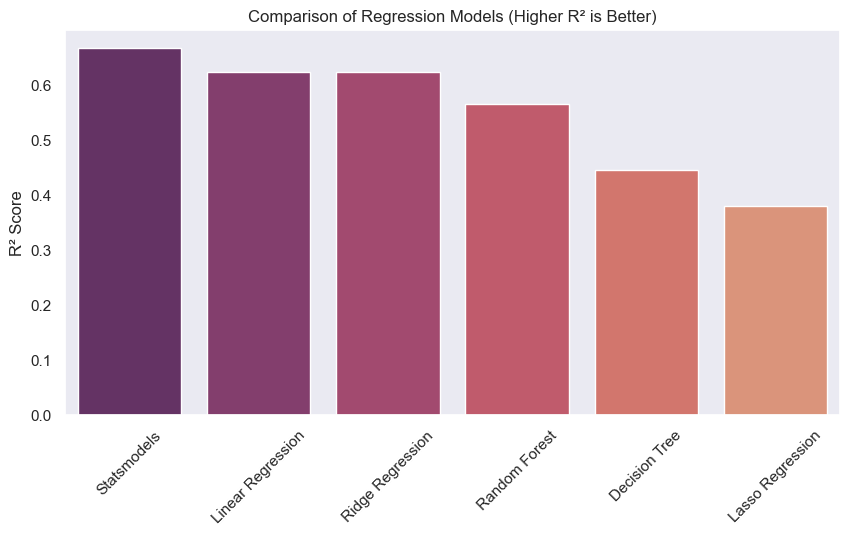

In [234]:
model_results = {
    "Statsmodels": (mse, r_squared),
    "Linear Regression": (mse_lr, r2_lr),
    "Ridge Regression": (mse_ridge, r2_ridge),
    "Lasso Regression": (mse_lasso, r2_lasso),
    "Decision Tree": (mse_dt, r2_dt),
    "Random Forest": (mse_rf, r2_rf),
}
results_df = pd.DataFrame(model_results, index=["MSE", "R² Score"]).T

# Sort by best R² Score
results_df = results_df.sort_values(by="R² Score", ascending=False)

# Display results
print(results_df)

plt.figure(figsize=(10, 5))
sns.barplot(x=results_df.index, y=results_df["R² Score"], hue=results_df.index, palette="flare_r", legend=False)
plt.title("Comparison of Regression Models (Higher R² is Better)")
plt.ylabel("R² Score")
plt.xlabel("")
plt.xticks(rotation=45)
plt.show()


## Linear Regression performs well but Statsmodels performs best

In the following I will apply different steps to further optimize the fit of the Linear Regression model and check if it improves over statsmodel:
- **RidgeCV** to find the best regularization strength
- **Feature Selection** using Lasso

In [237]:
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SelectFromModel

# Use RidgeCV to find the best alpha (regularization strength)
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 10), store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Select best features using Lasso
lasso = Lasso(alpha=0.01)  # Adjust alpha based on your dataset
lasso.fit(X_train, y_train)
mask = lasso.coef_ != 0
X_train_selected = X_train.loc[:, mask]
X_test_selected = X_test.loc[:, mask]

# Train optimized Linear Regression
lr_optimized = LinearRegression()
lr_optimized.fit(X_train_selected, y_train)
y_pred_optimized = lr_optimized.predict(X_test_selected)

# Evaluate performance
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Linear Regression -> MSE: {mse_optimized:.2f}, R² Score: {r2_optimized:.4f}")


Optimized Linear Regression -> MSE: 0.54, R² Score: 0.6257


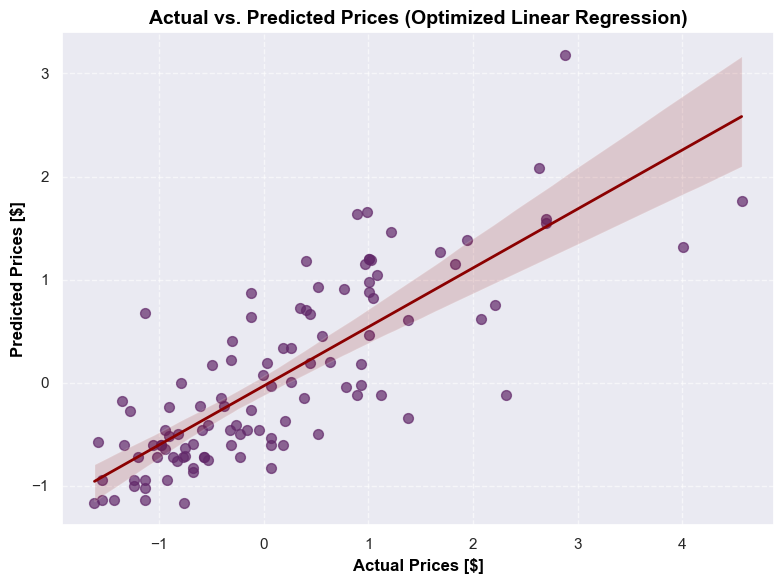

In [239]:
plt.figure(figsize=(8, 6))
sns.regplot(
    x=y_test, 
    y=y_pred_optimized, 
    scatter_kws={'alpha': 0.7, 's': 50, 'color': sns.color_palette("flare", as_cmap=True)(0.9)},
    line_kws={'color': 'darkred', 'lw': 2},
    marker='o'
)
plt.xlabel("Actual Prices [$]", fontsize=12, fontweight='bold', color='black')
plt.ylabel("Predicted Prices [$]", fontsize=12, fontweight='bold', color='black')
plt.title("Actual vs. Predicted Prices (Optimized Linear Regression)", fontsize=14, fontweight='bold', color='black')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The model does not improve dramatically.
Try to optimize the **statsmodel** further.

## (A) Try polynomial features

In [266]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_train_with_intercept = sm.add_constant(X_train_poly)
# Fit the model using OLS (Ordinary Least Squares)
model_poly = sm.OLS(y_train, X_train_with_intercept)
results_poly = model_poly.fit()
r_squared_poly = results_poly.rsquared
print("R-squared:", r_squared_poly)
mse_poly = np.mean(results_poly.resid**2)
print("Mean Squared Error:", mse_poly)
print(results_poly.summary())

R-squared: 0.7929149553349559
Mean Squared Error: 0.18284696187162253
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     13.89
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           1.78e-74
Time:                        09:44:10   Log-Likelihood:                -248.25
No. Observations:                 436   AIC:                             686.5
Df Residuals:                     341   BIC:                             1074.
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

Although R2 improves with a polynome of 2, no non-linear relationships were observed in the plots. I therefore assume the relationshsips are linear

## (B) Variation Inflation Factor

In [257]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print(vif_data)


                            feature       VIF
0                              area  1.152125
1                          bedrooms  1.196502
2                         bathrooms  1.576503
3                           stories  1.539786
4                           parking  1.413630
5                      mainroad_yes  4.219228
6                     guestroom_yes  1.524220
7                      basement_yes  2.090318
8               hotwaterheating_yes  1.070266
9               airconditioning_yes  1.778767
10                     prefarea_yes  1.465345
11  furnishingstatus_semi-furnished  1.981935
12     furnishingstatus_unfurnished  1.608705


No VIF >5 are detected and therefore no multilinearity problems are expected.

## (C) Select only the best features

In [277]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
selector = RFE(model, n_features_to_select=5)
X_train_selected_rfe = selector.fit_transform(X_train_selected, y_train)
X_train_with_intercept = sm.add_constant(X_train_selected_rfe)
# Fit the model using OLS (Ordinary Least Squares)
model_sel = sm.OLS(y_train, X_train_with_intercept)
results_sel = model_sel.fit()
r_squared_sel = results_sel.rsquared
print("R-squared:", r_squared_sel)
mse_sel = np.mean(results_sel.resid**2)
print("Mean Squared Error:", mse_sel)
print(results_sel.summary())

R-squared: 0.5625544237093276
Mean Squared Error: 0.3862451522672999
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     110.6
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           6.38e-75
Time:                        09:46:17   Log-Likelihood:                -411.28
No. Observations:                 436   AIC:                             834.6
Df Residuals:                     430   BIC:                             859.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

Model does not improve with feature selection.

## Try different encoder for numerical features

In [333]:
#Make copy of the df
df3 = df.copy()

from sklearn.preprocessing import (MinMaxScaler,
                                   LabelEncoder,
                                   OneHotEncoder)

categorical_cols = df3.select_dtypes(include=["object"]).columns
numeric_cols = df3.select_dtypes(include=["number"]).columns
df3[categorical_cols] = df3[categorical_cols].astype(str)
# Handle categorical features (One-Hot Encoding)
df_encoded2 = pd.get_dummies(df3, columns=categorical_cols, drop_first=True, dtype=int)

# Scale numeric features
scaler = MinMaxScaler()
df_encoded2[numeric_cols] = scaler.fit_transform(df_encoded2[numeric_cols])

# Display processed dataframe
df_encoded2.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,0.666667,1,0,0,0,1,1,0,0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.000000,1,0,0,0,1,0,0,0
2,0.909091,0.571134,0.4,0.333333,0.333333,0.666667,1,0,1,0,0,1,1,0
3,0.906061,0.402062,0.6,0.333333,0.333333,1.000000,1,0,1,0,1,1,0,0
4,0.836364,0.396564,0.6,0.000000,0.333333,0.666667,1,1,1,0,1,0,0,0


In [364]:
# Define features (X) and target variable (y)
X = df_encoded2.drop(columns=["price"])
y = df_encoded2["price"]

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (436, 13), Testing Set: (109, 13)


## Linear Regression with MinMaxScaler

In [337]:
# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression -> MSE: {mse_lr:.2f}, R² Score: {r2_lr:.4f}")
print("Intercept:", lr_model.intercept_)
print("Coefficients:", lr_model.coef_)

Linear Regression -> MSE: 0.01, R² Score: 0.6529
Intercept: 0.04139229158620045
Coefficients: [ 0.2972594   0.03323753  0.28427137  0.10583808  0.0584005   0.03185454
  0.02005282  0.03378798  0.05927705  0.0685218   0.05453598 -0.01098544
 -0.03581343]


## Statsmodel with MinMaxScaler

In [340]:
import statsmodels.api as sm
X_train_with_intercept = sm.add_constant(X_train)  # Adds a column of ones for the intercept

# Fit the model using OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train_with_intercept)
results = model.fit()
r_squared = results.rsquared
print("R-squared:", r_squared)
mse = np.mean(results.resid**2)
print("Mean Squared Error:", mse)
print(results.summary())

R-squared: 0.6859438988560158
Mean Squared Error: 0.007258920848115471
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     70.90
Date:                Wed, 26 Mar 2025   Prob (F-statistic):           2.16e-97
Time:                        10:18:22   Log-Likelihood:                 455.11
No. Observations:                 436   AIC:                            -882.2
Df Residuals:                     422   BIC:                            -825.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

## Both models improved

Check other models as well:

In [356]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
model = {
    'Linear Regression' : LinearRegression(),
    'Random Forest Regressor' : RandomForestRegressor(),
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    'XGBoost' : xgb.XGBRegressor(),            
    'XGRF Regressor' : xgb.XGBRFRegressor(),   
    'Support Vector regressor' : SVR(),
    'Lasso Reg' : Lasso(),
    'Ridge Reg' : Ridge(),
}

pred ={}


for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pred[name]=y_pred

In [360]:
acc= {} 
for name, y_pred in pred.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc[name] = r2
    print(f"Results for {name} : ")
    print (f"Mean Square Error : {mse}")
    print(f"R2 Score : {r2}")

Results for Linear Regression : 
Mean Square Error : 0.013150568297675583
R2 Score : 0.6529242642153177
Results for Random Forest Regressor : 
Mean Square Error : 0.014667607987182665
R2 Score : 0.6128858678105553
Results for Gradient Boost Regressor : 
Mean Square Error : 0.012623610833269431
R2 Score : 0.6668319635288389
Results for XGBoost : 
Mean Square Error : 0.01593121163078895
R2 Score : 0.5795362699515506
Results for XGRF Regressor : 
Mean Square Error : 0.016421026474436808
R2 Score : 0.5666088554543849
Results for Support Vector regressor : 
Mean Square Error : 0.013592490701083352
R2 Score : 0.6412608486236435
Results for Lasso Reg : 
Mean Square Error : 0.038568818816935684
R2 Score : -0.017925679424830143
Results for Ridge Reg : 
Mean Square Error : 0.013171380552311604
R2 Score : 0.6523749777945619


In [378]:
# Train the model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate performance
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Linear Regression -> MSE: {mse_gb:.2f}, R² Score: {r2_gb:.4f}")

Linear Regression -> MSE: 0.01, R² Score: 0.6661


In [372]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import numpy as np

gb_model = GradientBoostingRegressor()

# Apply Cross-Validation
cv_scores = cross_val_score(gb_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Calculate the mean and standard deviation of the MSE
mean_mse = np.mean(-cv_scores)
std_mse = np.std(-cv_scores)

# Print the results
print(f"Cross-Validation MSE: {mean_mse:.4f} ± {std_mse:.4f}")

Cross-Validation MSE: 0.0089 ± 0.0026


<Figure size 800x600 with 0 Axes>

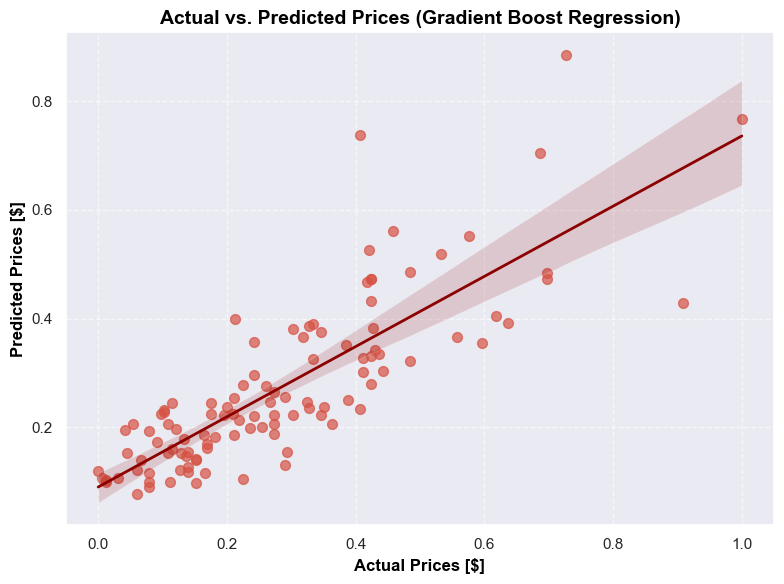

In [384]:
plt.figure(figsize=(8, 6))
sns.regplot(
    x=y_test, 
    y=y_pred_gb, 
    scatter_kws={'alpha': 0.7, 's': 50, 'color': sns.color_palette("coolwarm", as_cmap=True)(0.9)},
    line_kws={'color': 'darkred', 'lw': 2},
    marker='o'
)
plt.xlabel("Actual Prices [$]", fontsize=12, fontweight='bold', color='black')
plt.ylabel("Predicted Prices [$]", fontsize=12, fontweight='bold', color='black')
plt.title("Actual vs. Predicted Prices (Gradient Boost Regression)", fontsize=14, fontweight='bold', color='black')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Conclusion

Standard Models performed reasonably well with accuracies between 0.6 and 0.65.
Apparently, the way of scaling the numeric features slightly affected the fitting -> MinMaxiScaler() > StandardScaler()